In [2]:
from __future__ import division, unicode_literals, print_function
# for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles!
mpl.rc('figure', figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series # for convenience

import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"

import pims
import trackpy as tp

In [4]:
@pims.pipeline
def as_grey(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

frames = as_grey(pims.Video("sample.wmv"))

Frame([[139.856 , 139.856 , 139.856 , ..., 129.1308, 129.1308, 129.1308],
       [139.856 , 139.856 , 139.856 , ..., 126.1308, 125.1308, 125.1308],
       [140.856 , 140.856 , 140.856 , ..., 129.2087, 129.2087, 129.2087],
       ...,
       [135.2848, 135.2848, 135.2848, ..., 132.3531, 133.3531, 135.3531],
       [135.2848, 135.2848, 135.2848, ..., 134.3531, 135.3531, 137.3531],
       [116.2848, 116.2848, 116.2848, ..., 111.8578, 113.7136, 114.6415]])
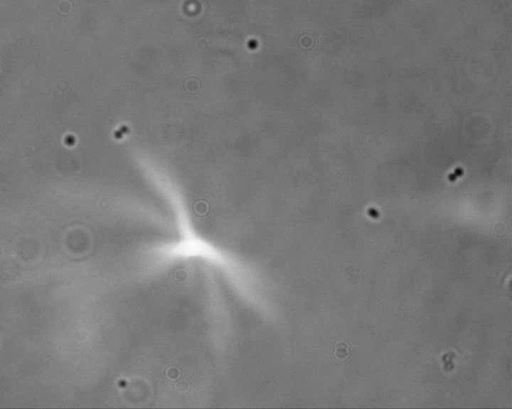

In [5]:
frames[0]

In [6]:
micron_per_pixel = 0.15192872980868
feature_diameter = 2.8 # um
radius = int(np.round(feature_diameter/2.0/micron_per_pixel))
if radius % 2 == 0:
    radius + 1

print('Using a radius of {:d} px'.format(radius))
frames

Using a radius of 9 px


(ImageIOReader,) processed through proc_func. Original repr:
    <FramesSequenceND>
    Axes: 3
    Axis 'x' size: 720
    Axis 'y' size: 576
    Axis 't' size: 703
    Pixel Datatype: uint8

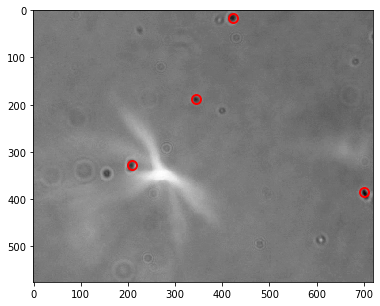

In [60]:
f_locate = tp.locate(frames[78], radius+2, minmass=600, invert=True)
tp.annotate(f_locate, frames[78], plot_style={'markersize': radius});

In [89]:
f_locate = tp.batch(frames, radius+2, minmass=600, invert=True)

Frame 702: 1 features


[Text(0, 0.5, 'count'), Text(0.5, 0, 'mass')]

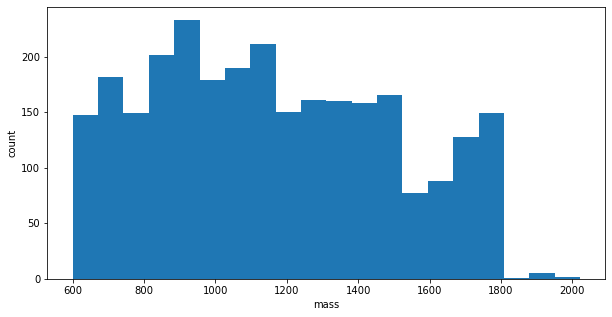

In [90]:
fig, ax = plt.subplots()
ax.hist(f_locate['mass'], bins=20)

ax.set(xlabel='mass', ylabel='count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6aa247f0>,
      dtype=object)

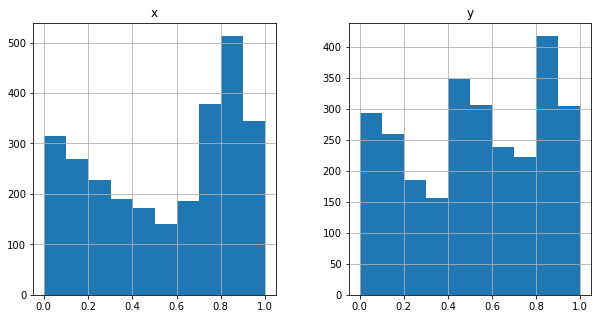

In [91]:
tp.subpx_bias(f_locate)

In [85]:
f_locate = tp.batch(frames[:300], radius+2, minmass=600, invert=True)

Frame 90: 5 features


KeyboardInterrupt: 

In [99]:
t = tp.link(f_locate, 30, memory=30)

Frame 702: 1 trajectories present.


In [102]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,62.099031,354.141191,1561.236246,3.332463,0.016084,28.009262,-6197.4817,0.119146,0,0
1,189.191515,165.989214,1168.546397,3.190500,0.039432,23.247687,-8378.0831,0.179253,0,1
2,197.177935,98.069114,1304.951502,3.289462,0.020557,26.048613,-7314.8701,0.143865,0,2
3,241.315240,644.240680,1367.412155,3.233821,0.058468,26.608799,-6204.7805,0.119279,0,3
4,249.628272,635.281771,1176.949176,3.203253,0.032859,22.687502,-7202.7059,0.140930,0,4


In [105]:
t1 = tp.filter_stubs(t, 25)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 80
After: 28


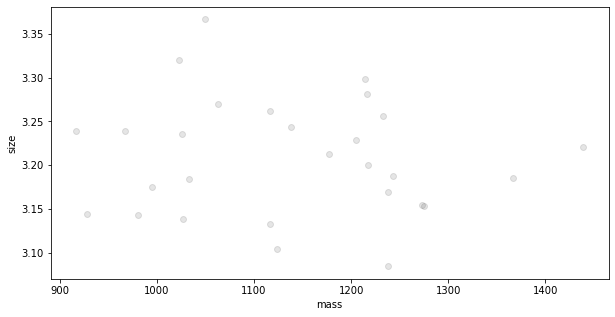

In [106]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

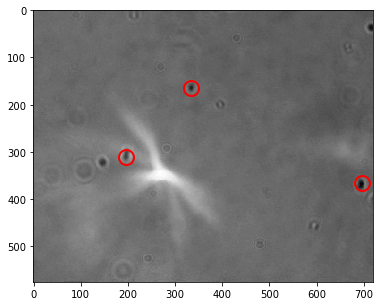

In [107]:
plt.figure()
tp.annotate(t1[t1['frame'] == 71], frames[71])